## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [1]:
import numpy as np
import pandas as pd

reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)

print(type(reviews))
print(reviews.head())

<class 'pandas.core.frame.DataFrame'>
                                                   0
0  bromwell high is a cartoon comedy . it ran at ...
1  story of a man who has unnatural feelings for ...
2  homelessness  or houselessness as george carli...
3  airport    starts as a brand new luxury    pla...
4  brilliant over  acting by lesley ann warren . ...


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

**(d)** Test your sentiment-classifier on the test set.

**(e)** Use the classifier to classify a few sentences you write yourselves. 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

with open('reviews.txt', 'r', encoding='utf-8') as f:
    reviews = f.readlines()

with open('labels.txt', 'r', encoding='utf-8') as f:
    labels = f.readlines()

reviews = [review.strip() for review in reviews]
labels = [label.strip() for label in labels]

assert len(reviews) == len(labels), "Mismatch between reviews and labels."

X_train, X_temp, y_train, y_temp = train_test_split(reviews, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

vectorizer = CountVectorizer(max_features=10000)

X_train_bow = vectorizer.fit_transform(X_train)
X_val_bow = vectorizer.transform(X_val)
X_test_bow = vectorizer.transform(X_test)

print(f"Training data shape: {X_train_bow.shape}")
print(f"Validation data shape: {X_val_bow.shape}")
print(f"Test data shape: {X_test_bow.shape}")

import pandas as pd

feature_names = vectorizer.get_feature_names_out()

X_train_dense = X_train_bow.toarray()

bow_df = pd.DataFrame(X_train_dense, columns=feature_names)

print(bow_df.head())

Training data shape: (17500, 10000)
Validation data shape: (3750, 10000)
Test data shape: (3750, 10000)
   aaron  abandon  abandoned  abbott  abc  abducted  abigail  abilities  \
0      0        0          0       0    0         0        0          0   
1      0        0          0       0    0         0        0          0   
2      0        0          0       0    0         0        0          0   
3      0        1          0       0    0         0        0          0   
4      0        0          0       0    0         0        0          0   

   ability  able  ...  zeta  zizek  zombi  zombie  zombies  zone  zoo  zoom  \
0        0     0  ...     0      0      0       0        0     0    0     0   
1        0     0  ...     0      0      0       0        0     0    0     0   
2        0     0  ...     0      0      0       0        0     0    0     0   
3        0     0  ...     0      0      0       0        0     0    0     0   
4        0     0  ...     0      0      0       0 

In [3]:
import numpy as np
import pandas as pd

feature_names = vectorizer.get_feature_names_out()
vocab_df = pd.DataFrame({
    'Word': feature_names,
    'Index': np.arange(len(feature_names))
})

print("Vocabulary sample:")
print(vocab_df.head(10))

def represent_word(word):
    if word in vectorizer.vocabulary_:
        index = vectorizer.vocabulary_[word]
        print(f"Word: '{word}' is represented at index: {index}")
        print(f"Corresponding feature vector (binary): {np.eye(len(feature_names))[index]}")
    else:
        print(f"Word: '{word}' is not in the vocabulary.")

def represent_review(review):
    transformed = vectorizer.transform([review])
    print(f"Bag-of-Words representation of the review (sparse):\n{transformed}")
    dense_representation = transformed.toarray()
    print(f"Bag-of-Words representation of the review (dense):\n{dense_representation}")
    bow_df = pd.DataFrame(dense_representation, columns=feature_names)
    print(f"DataFrame representation of the review:\n{bow_df}")

represent_word("great")

sample_review = "The movie was great and entertaining."
represent_review(sample_review)

Vocabulary sample:
        Word  Index
0      aaron      0
1    abandon      1
2  abandoned      2
3     abbott      3
4        abc      4
5   abducted      5
6    abigail      6
7  abilities      7
8    ability      8
9       able      9
Word: 'great' is represented at index: 3886
Corresponding feature vector (binary): [0. 0. 0. ... 0. 0. 0.]
Bag-of-Words representation of the review (sparse):
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (1, 10000)>
  Coords	Values
  (0, 324)	1
  (0, 2966)	1
  (0, 3886)	1
  (0, 5840)	1
  (0, 8953)	1
  (0, 9684)	1
Bag-of-Words representation of the review (dense):
[[0 0 0 ... 0 0 0]]
DataFrame representation of the review:
   aaron  abandon  abandoned  abbott  abc  abducted  abigail  abilities  \
0      0        0          0       0    0         0        0          0   

   ability  able  ...  zeta  zizek  zombi  zombie  zombies  zone  zoo  zoom  \
0        0     0  ...     0      0      0       0        0    

#### Bag of Words anaylsis ####
The bag of words were implemented by us following lighly Ole's github example https://github.com/olehougaard/mal1-a24/blob/main/10%20Neural%20Networks/bag%20of%20words.ipynb as well as additional guide from https://www.datacamp.com/tutorial/python-bag-of-words-model?dc_referrer=https%3A%2F%2Fwww.google.com%2F </br>
In any case, the results seems to be fine - the shapes of training,validation and test datasets are a confimation that it is working as intended - traiining data consisting of 17500 revies and 10000 different words, validation (3750,,10000) and Test data (3750, 10000).</br>
The fact that many words are represented by value 0 was to be expected as not all words appear in every review (also most likely noone will use word like aaron right?)</br>
The vocabulary is nicely represented - the words appear to be very diverse from aaron to zombie.
Additionally the vocabulary sample and Sparse Row Matrix/Density works as additional proof that the bag-of-words was implemented correctly.
From above mentioned we gain the additional insight on:</br>
- words presence (words and its frequency)</br>
- it is memory efficient beacuse we dont store all 0's representing missing words</br>
- EXAMPLE: (0, 3886) means the word at index 3886 (great) appears once in this review.

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

with open('reviews.txt', 'r', encoding='utf-8') as f:
    reviews = f.readlines()

with open('labels.txt', 'r', encoding='utf-8') as f:
    labels = f.readlines()

reviews = [review.strip() for review in reviews]
labels = [label.strip() for label in labels]

assert len(reviews) == len(labels), "Mismatch between reviews and labels."

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

X_train, X_temp, y_train, y_temp = train_test_split(reviews, encoded_labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

vectorizer = CountVectorizer(max_features=10000)

X_train_bow = vectorizer.fit_transform(X_train).toarray()
X_val_bow = vectorizer.transform(X_val).toarray()
X_test_bow = vectorizer.transform(X_test).toarray()

model = Sequential()
model.add(Dense(128, input_dim=10000, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_bow, y_train, epochs=20, batch_size=512, validation_data=(X_val_bow, y_val), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test_bow, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

c:\Users\Test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.7154 - loss: 0.6781 - val_accuracy: 0.8864 - val_loss: 0.3086
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9348 - loss: 0.1849 - val_accuracy: 0.8848 - val_loss: 0.3043
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9684 - loss: 0.0991 - val_accuracy: 0.8792 - val_loss: 0.3764
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9866 - loss: 0.0520 - val_accuracy: 0.8772 - val_loss: 0.4727
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9953 - loss: 0.0226 - val_accuracy: 0.8668 - val_loss: 0.5689
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.9987 - loss: 0.0120 - val_accuracy: 0.8768 - val_loss: 0.6412
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9996 - loss: 0.0061 - val_accuracy: 0.8736 - val_loss: 0.6944
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8820 - loss: 0.2995
Test Accuracy: 0.8824


#### Analyze of results of neural network with one hidden layer ####
<b>The mismatch between numbers present in epochs and in the following desription comes from the fact that we have experimented with manually tuning 3 things (Adam's learning_rate: 0.01 vs 0.001, batch_size: 32 vs 512 vs 1024, epochs: 10 vs 20)</b>

Ideally, we would use kerastuner.tuners so the model could tune hyperparameters on its own - leading to best possible performance.</br>

Within first 2 epochs the accuracy of the model grow rapidly, with stable validation accuracy around 0.89 meaning that the model is learning rapidly with a small tendency for overfitting.</br>
Around 3rd epoch the model cease to improve it's accuracy so rapidly, with furthermore confirmation of its tendency for overfitting</br>
After not improving more - patience is 5 epochs - the model executes EarlyStopping callback to avoid wasting more resources.</br>
The total models accuracy is 88.48% on the test set which is close to the validation accuracy ~88% meaning that the model tends to work well on unseen data also.</br>
Test loss is 0.2903 wchich is lower than the validation loss at the last epoch (0.4530) which means that the early stopping mechanism works as intended - restoring the best weights which will prevent further overfitting.</br>
We see potential room for improvement by using regularization, tuning hyperparameters (we can experiment with learning rates, batch sizes or number of hidden layers, swapping CountVectorizer for something more advanced) and/or using more than 10000 words for CountVectorizer</br>

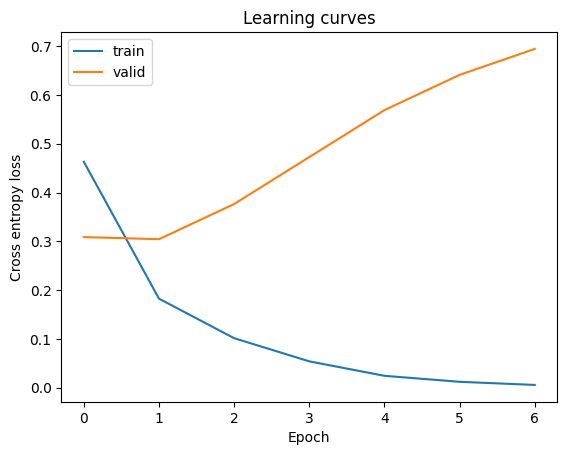

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

#### Learning Curves ####
Although the shape of learning curves follows the principle, we are not fully satisfied with model performance as we do recognize that we could tune it much better</br>

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Accuracy: 0.8824
Confusion Matrix:
[[1131  133]
 [ 161 1075]]


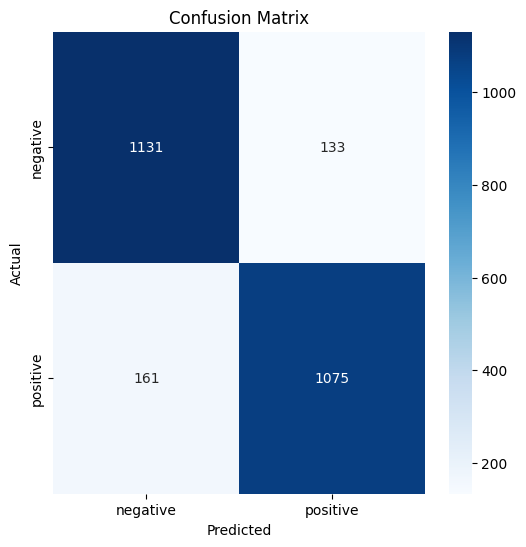

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_prob = model.predict(X_test_bow)
y_pred = (y_pred_prob > 0.5).astype(int)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)


#### Confusion Matrix & Our sentences ####
The confusion matrix is providing us with exact numbers on how many false positive (FP), false negatives (FN), true positive (TP) and true negatives (TN) the model identified</br>
If we really wanted to we can confirm that out accuracy is exactly the byproduct of using the formula for confusion matrix</br>
<b>Accuracy = TP + TN/Total Samples</b>===>
1156+1056/2500 = 0.8848</br>
For our model precision from the formula <b>Precision = TP/TP+FP</b> ===> 1056/1164 ~= 0.907</br>
Therefore the precision is 90.7% which means that the model predicting positive is right in ~90.7% cases.
We can also calculate recall which is a metric representing how many actual positive reviews the model correcly identifies.
<b>True positive rate/Recall = TP/TP+FN ===> 1056/1235 ~= 85.5%</b></br>
Displaying all those numbers is a feature available in accuracy_scrore from sklearn.metrics.</br>

We will also already dive into our own senteces to add some meaning to the confusion matrix.</br>
The presence of False Positives can happen due to weird words, ambigous language, or words that have positive meaning in negative reviews.</br>
Few of out senteces serves a purpose of highlighting this tendency, as they are written to trigger that effect specifically.</br>
False negatives - the model is sometimes missing positive reviews, which is also expected due to the fact that the model has not learned all types of positive expression (although minuscule)</br>

Overall, the confusion matrix is following one of the examples from our lectures and it was describes as "really good ratio" meaning the model is not overfitting too much</br>

In [7]:
#Example sentences to classify (generated by chatGPT and some crazy ones written by us to test how well it does with many contradictions in the same sentence)
our_sentences = [
    "The movie was absolutely fantastic and inspiring.",
    "I didn't enjoy the film; it was too boring and slow.",
    "What a great experience! I'll definitely recommend it to everyone.",
    "The plot was weak, and the acting was terrible.",
    "It was okay, but I have seen better movies.",
    "The movie was so boring, but I think that was the idea so I recommend it",
    "I cannot recommend eating my cat, i got diarrhea",
    "It was the best beer ever, I blacked out for 3 days, totally not recommend"
]

our_sentences_bow = vectorizer.transform(our_sentences)
predictions_prob = model.predict(our_sentences_bow)
predictions = (predictions_prob > 0.5).astype(int)

predicted_labels = label_encoder.inverse_transform(predictions.flatten())

for sentence, label, prob in zip(our_sentences, predicted_labels, predictions_prob.flatten()):
    print(f"Sentence: {sentence}")
    print(f"Predicted Sentiment: {label} (Confidence: {prob:.2f})\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
Sentence: The movie was absolutely fantastic and inspiring.
Predicted Sentiment: positive (Confidence: 0.85)

Sentence: I didn't enjoy the film; it was too boring and slow.
Predicted Sentiment: negative (Confidence: 0.26)

Sentence: What a great experience! I'll definitely recommend it to everyone.
Predicted Sentiment: positive (Confidence: 0.87)

Sentence: The plot was weak, and the acting was terrible.
Predicted Sentiment: negative (Confidence: 0.14)

Sentence: It was okay, but I have seen better movies.
Predicted Sentiment: negative (Confidence: 0.36)

Sentence: The movie was so boring, but I think that was the idea so I recommend it
Predicted Sentiment: negative (Confidence: 0.29)

Sentence: I cannot recommend eating my cat, i got diarrhea
Predicted Sentiment: positive (Confidence: 0.57)

Sentence: It was the best beer ever, I blacked out for 3 days, totally not recommend
Predicted Sentiment: positive (Confidence: 0.74)

